In [1]:
%load_ext autoreload
%autoreload 2
notebook_fixed_dir = False

In [7]:
# this cell can only be called once
import os
if not notebook_fixed_dir:
    os.chdir('..')
    notebook_fixed_dir = True
print(os.getcwd())

/home/svcl-oowl/brandon/research/sil_consistent_at_inference


In [17]:
import pprint
import glob

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils import utils

In [10]:
DATASET_PATH = "data/test_dataset"

mesh_paths = sorted(glob.glob(os.path.join(DATASET_PATH, "*mesh.obj")))
data_paths = []
for mesh_path in mesh_paths:
    instance_number = int(mesh_path.split('/')[-1][:2])
    instance_img_path = os.path.join(DATASET_PATH, "{:02d}_in.jpg".format(instance_number))
    instance_mask_path = os.path.join(DATASET_PATH, "00{:02d}.png".format(instance_number+1))
    data_paths.append({"mesh": mesh_path, "input_img": instance_img_path, "mask": instance_mask_path})

In [23]:
device = torch.device("cuda:0")
batch_size = 8

num_azims = 8
# 0.,  45.,  90., 135., 180., 225., 270., 315.
azims = torch.linspace(0, 360, num_azims+1)[:-1]
elevs = torch.ones(num_azims) * 25
dists = torch.ones(num_azims) * 2.7

for data in data_paths:
    with torch.no_grad():
        mesh = utils.load_untextured_mesh(data['mesh'], device)
        renders = utils.batched_render(mesh, azims, elevs, dists, batch_size, device)

    break

100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


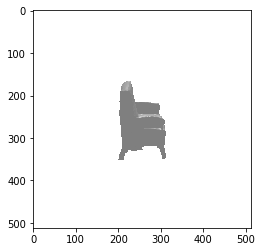

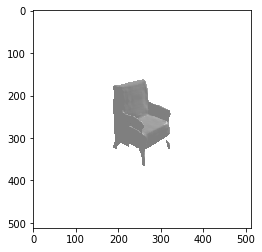

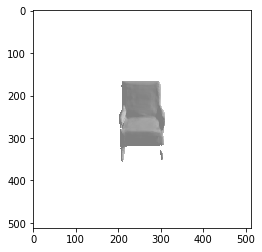

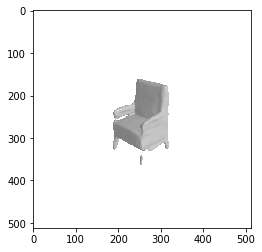

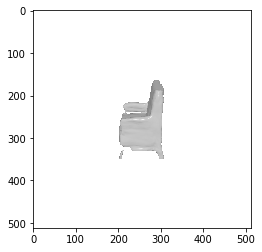

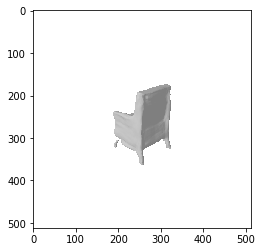

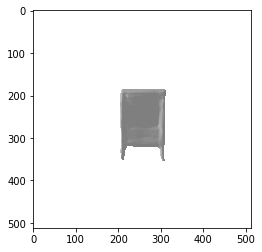

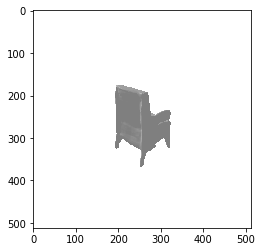

In [24]:
for render in renders:
    plt.imshow(render[ ..., :3].cpu().numpy())
    plt.show()

In [ ]:
# todo:
* fix lighting
* fix zoom
* render all